<a href="https://colab.research.google.com/github/supsi-dacd-isaac/TeachDecisionMakingUncertainty/blob/main/Visualize_Gfun_Ifun_FailureDomain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graphical outlook on useful function for reliability analysis and stochastic  optimization


1. g(x) := limit state function  = a0 + a1x
2. I(x) := inidicator function  = 1 if g(x) <=0 else 0
3. f(x) := data distribution  = Normal(mean, std)

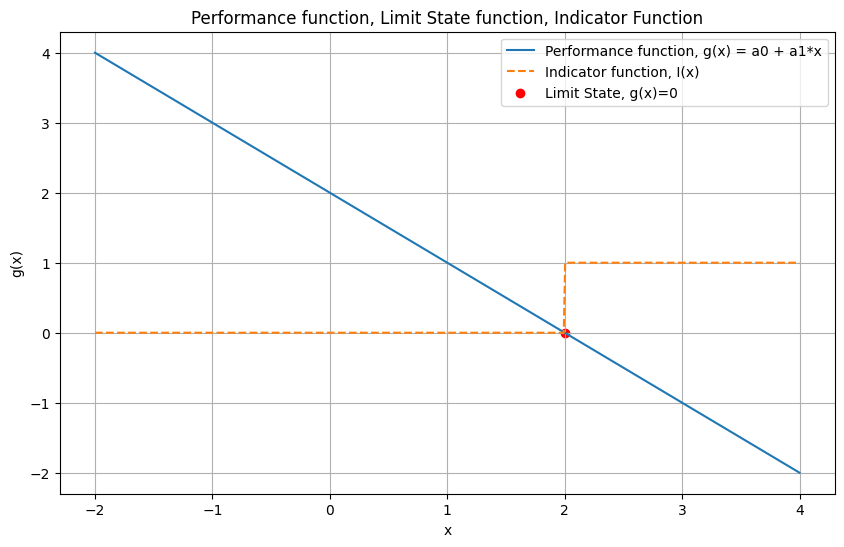

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the limit state function g(x)
a0, a1 = 2,  -1
g_fun = lambda x: a0 + a1 * x # Calculate g(x)
I_fun = lambda x: np.where(g_fun(x) <= 0, 1, 0)  # Indicator function I(x)
lsf =  -a0/a1

# visualize
x_2plot = np.linspace(-2, 4, 500)  # Range of x values for plotting

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_2plot, g_fun(x_2plot), label='Performance function, g(x) = a0 + a1*x')  # Plot g(x)
plt.plot(x_2plot, I_fun(x_2plot), label='Indicator function, I(x)', linestyle='--') # Plot indicator function
plt.scatter(lsf, 0, label='Limit State, g(x)=0', c='r') # Plot indicator function
plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('Performance function, Limit State function, Indicator Function')
plt.legend()
plt.grid(True)
plt.show()

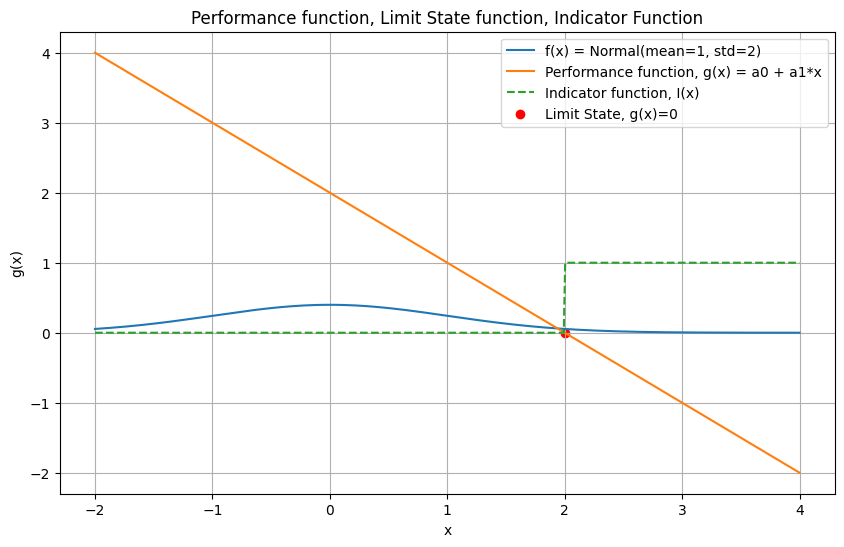

In [30]:
# Normal distribution (PDF)
mean, std_dev = 0.0, 1.0
pdf_fun =  lambda x: norm.pdf(x, loc=mean, scale=std_dev)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the normal distribution
plt.plot(x_2plot, pdf_fun(x_2plot), label='Probability distribution, f(x)')

plt.plot(x_2plot, g_fun(x_2plot), label='Performance function, g(x) = a0 + a1*x')  # Plot g(x)
plt.plot(x_2plot, I_fun(x_2plot), label='Indicator function, I(x)', linestyle='--') # Plot indicator function
plt.scatter(lsf, 0, label='Limit State, g(x)=0', c='r') # Plot indicator function
plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('Performance function, Limit State function, Indicator Function')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-76-3da0270b6b56>:50: UserWarning: The following kwargs were not used by contour: 'cmp'
  contours = plt.contourf(X1, X2, G, levels=10, cmp='Blues', alpha=0.1)


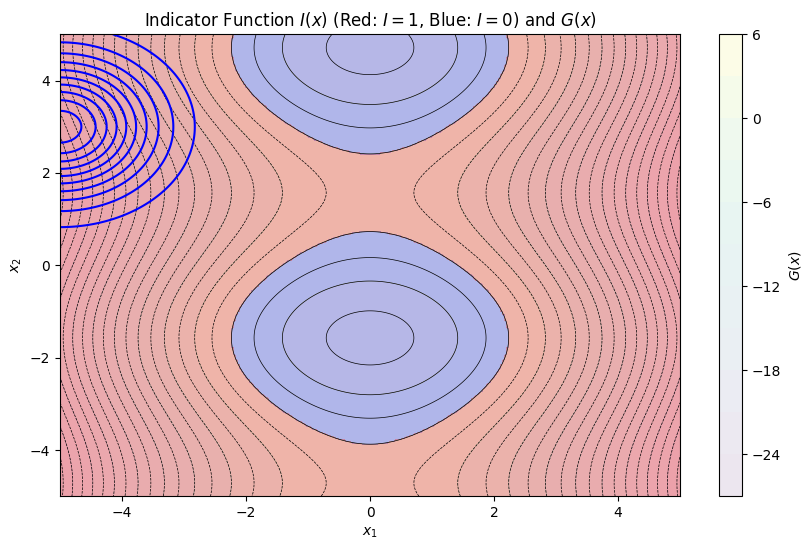

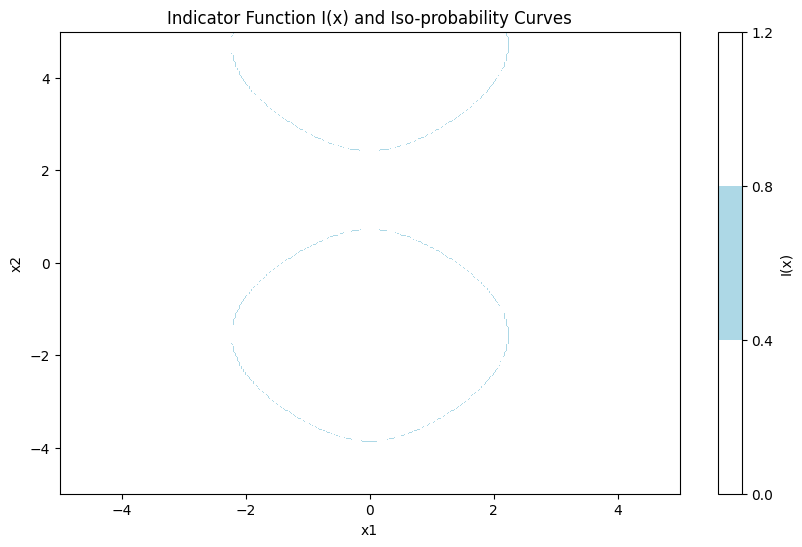

In [76]:
# prompt: from scipy import optimize
# # Parameters for the limit state function g(x)
# a0, a1, a2 = 2,  -1  , -3
# g_fun = lambda x: a0 + a1 * x[0] + a2 * x[1] # Calculate g(x)
# I_fun = lambda x: np.where(g_fun(x) <= 0, 1, 0)  # Indicator function I(x)
# lsf =  lambda x,x0: optimize.root(g_fun, x0, method='hybr').x
# mean1, mean2 = -1, 1
# std_dev1, std_dev2 = .5, .5
# pdf_x1x2 = lambda x: norm.pdf(x[0], loc=mean1, scale=std_dev1) * norm.pdf(x[0], loc=mean2, scale=std_dev2)  # Joint PDF_1and2 = PDF1 * PDF2 (independence assumtion)
# # Create the plot
# # 1) a plot x1 vs x2 where we show the area where I(x) =1
# # 2) same plot as 1) but additionally we add the iso-probability curves for pdfx1_x2
# # be careful abut the shape of the indicator functio nwhen you mesh

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import optimize

# Parameters for the limit state function g(x)
a0, a1, a2 = 2, -1, -3
g_fun = lambda x: a0 + a1 * x[0]**2 + a2 *  np.sin(x[1])  # Calculate g(x)
I_fun = lambda x: np.where(g_fun(x) <= 0, 1, 0)  # Indicator function I(x)
# lsf = lambda x, x0: optimize.root(g_fun, x0, method='hybr').x

mean1, mean2 = -5, 3
std_dev1, std_dev2 = 1, 1
pdf_x1x2 = lambda x: norm.pdf(x[0], loc=mean1, scale=std_dev1) * \
    norm.pdf(x[1], loc=mean2, scale=std_dev2)  # Joint PDF

# Create a meshgrid for x1 and x2
x1 = np.linspace(-5, 5, 300)
x2 = np.linspace(-5, 5, 300)
X1, X2 = np.meshgrid(x1, x2)
X = np.array([X1, X2])

# Calculate g(x) and I(x) for the meshgrid
G = g_fun(X)
I = I_fun(X)
P = pdf_x1x2(X)


# Plot 1: Binary indicator function I(x)
plt.figure(figsize=(10, 6))

# Plot I(x): I=1 in red, I=0 in blue
plt.contourf(X1, X2, I, levels=[-0.5, 0.5, 1.5], colors=['blue', 'red'], alpha=0.3)

# Overlay G(x) with a light colormap
contours = plt.contourf(X1, X2, G, levels=10, alpha=0.1)

# Add contour lines for G(x)
plt.contour(X1, X2, G, levels=20, colors='k', linewidths=0.5)

# Add contour lines for G(x)
CS = plt.contour(X1, X2, P, levels=10, colors='b')

# Add labels and title
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Indicator Function $I(x)$ (Red: $I=1$, Blue: $I=0$) and $G(x)$')
plt.colorbar(contours, label='$G(x)$')
plt.show()

# Plot 2: I(x) and Iso-probability curves
plt.figure(figsize=(10, 6))
plt.contourf(X1, X2, I, levels=2, colors=['white', 'lightblue'])

plt.clabel(CS, inline=1, fontsize=8)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Indicator Function I(x) and Iso-probability Curves')
plt.colorbar(label='I(x)')
plt.show()


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

class LimitStateFunction:
    def __init__(self, g_fun, dim=1):
        """
        Initializes the limit state function with a general function g(x).
        Args:
          g_fun: The limit state function g(x). Must return a scalar.
          dim: Dimension of the input x (default is 1 for 1D).
        """
        self.g_fun = g_fun
        self.dim = dim

    def find_failure_boundary(self, initial_guess=None, bounds=None, method='hybr'):
        """
        Finds the failure boundary g(x) = 0 using numerical root-finding.
        Args:
          initial_guess: Initial guess for the root (required for nonlinear cases).
          bounds: For 1D, a tuple (a, b) to bracket the root (optional).
          method: Solver method (default: 'hybr' for multi-dimensional, 'brentq' for 1D).
        Returns:
          Root(s) x where g(x) ≈ 0, or None if no root is found.
        """
        if self.dim == 1:
            # Handle 1D case with scipy.optimize.root_scalar
            from scipy.optimize import root_scalar
            if bounds is not None:
                result = root_scalar(self.g_fun, bracket=bounds, method='brentq')
            else:
                result = root_scalar(self.g_fun, x0=initial_guess, method='newton')
            return result.root if result.converged else None
        else:
            # Handle multi-dimensional case with scipy.optimize.root
            result = root(self.g_fun, x0=initial_guess, method=method)
            return result.x if result.success else None

    def plot_failure_boundary(self, x_range=(-10, 10), y_range=(-10, 10), grid_res=100):
        """
        Plots the failure boundary g(x) = 0 for 2D cases.
        Args:
          x_range: Range for x1 values.
          y_range: Range for x2 values.
          grid_res: Grid resolution (default: 100).
        """
        if self.dim != 2:
            raise ValueError("Plotting is only supported for 2D cases.")

        x1 = np.linspace(x_range[0], x_range[1], grid_res)
        x2 = np.linspace(y_range[0], y_range[1], grid_res)
        X1, X2 = np.meshgrid(x1, x2)
        Z = np.zeros_like(X1)

        for i in range(grid_res):
            for j in range(grid_res):
                Z[i, j] = self.g_fun([X1[i, j], X2[i, j]])

        plt.contour(X1, X2, Z, levels=[0], colors='r')
        plt.xlabel('$x_1$')
        plt.ylabel('$x_2$')
        plt.title('Failure Boundary $g(x) = 0$')
        plt.grid()
        plt.show()


# Define a linear limit state function: g(x) = 2 - x
def linear_g(x):
    return 2 - x

lsf_linear = LimitStateFunction(linear_g, dim=1)
root = lsf_linear.find_failure_boundary(initial_guess=0)
print(f"1D Failure Boundary: x = {root}")  # Output: x = 2.0


# Define a nonlinear limit state function: g(x) = x^2 - 4
def nonlinear_g(x):
    return x**2 - 4

lsf_nonlinear = LimitStateFunction(nonlinear_g, dim=1)
root = lsf_nonlinear.find_failure_boundary(bounds=(-5, 5))
print(f"1D Nonlinear Roots: x = {root}")  # Output: x ≈ ±2.0


# Define a 2D limit state function: g(x1, x2) = x1^2 + x2^2 - 1 (circle)
def circle_g(x):
    return x[0]**2 + x[1]**2 - 1

lsf_2d = LimitStateFunction(circle_g, dim=2)
lsf_2d.plot_failure_boundary(x_range=(-2, 2), y_range=(-2, 2))  # Plots a circle




1D Failure Boundary: x = 2.0


ValueError: f(a) and f(b) must have different signs